In [153]:
# Make Jupyter full screen (not necessary on Colab)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [154]:
%load_ext autoreload
%autoreload 2

import os, sys
sys.path.append(os.path.abspath("/home/laklevi1/anarh/Loan Defualt PhD Project/"))
from loan_default_util_funcs import *

%config Completer.use_jedi = False
%load_ext watermark
%watermark --iversions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
seaborn   : 0.11.1
sys       : 3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
pandas    : 1.4.3
numpy     : 1.21.5
matplotlib: 3.5.2
scipy     : 1.7.3
tensorflow: 2.7.0
hvplot    : 0.8.4
plotly    : 4.14.3



In [155]:
!pwd

/home/laklevi1/anarh/Loan Defualt PhD Project


In [156]:
ptdir = "./"
print(check_output(["ls", "{}".format(ptdir)]).decode("utf8"))

BNN.ipynb
DOC-20230729-WA0000.xlsx
Joyce_project.ipynb
OVERALL.xlsx
Sharon_polygon-Copy1.ipynb
__pycache__
archive
aseda_loan_default_prediction.ipynb
aseda_loanprediction_script.ipynb
baised.pdf
baised.png
baised1.pdf
baisede.pdf
bar_plot.pdf
catboost_info
compare_ls.pdf
file.pkl
galog.log
greedy_algorithm_test.ipynb
heatmap.pdf
heatmap.png
loanDefault.log
loanIsoForest.csv
loan_default_Edit_0.ipynb
loan_default_Edit_1.ipynb
loan_default_Edit_2-Copy1.ipynb
loan_default_Edit_2-Copy2.ipynb
loan_default_Edit_2.ipynb
loan_default_Edit_3.ipynb
loan_default_Edit_4.ipynb
loan_default_util_funcs.py
loaninfo.tex
newTEST_set.npy
newTRAIN_set.npy
output.log
pairplot_high_res_quantile.pdf
pairplot_high_res_quantile.png
pipeline.html
scaled_loan_output.csv
skew_distribution.pdf
skew_distribution.png
summary_stats.tex
tsako.ipynb
unbaised.pdf
unbaised.png
unbaised1.pdf
veg_missing_data_.png
vegbaised.pdf
vegbaised.png
vis_missing_data_.png
vismisD.pdf
visualizing_missing_data_.png
visualizing_missi

In [157]:
# Use TeX fonts
plt.rc("text", usetex=True)
# plt.rc('font', family='serif')
# plt.rc('font', size=10.0)
# plt.rc('font', weight='normal')
# plt.rc('legend', fontsize='x-large')

In [ ]:
# Create a folder to save figures
output_folder = 'output_figures'
os.makedirs(output_folder, exist_ok=True)

In [158]:
curDir = '/home/laklevi1/anarh/Loan Defualt PhD Project'

* Read in info file

In [159]:
data_info = pd.read_csv(curDir + '/archive/lending_club_info.csv')
data_info

LoanStatNew                                        Description
0              loan_amnt  The listed amount of the loan applied for by t...
1                   term  The number of payments on the loan. Values are...
2               int_rate                          Interest Rate on the loan
3            installment  The monthly payment owed by the borrower if th...
4                  grade                             LC assigned loan grade
5              sub_grade                          LC assigned loan subgrade
6              emp_title  The job title supplied by the Borrower when ap...
7             emp_length  Employment length in years. Possible values ar...
8         home_ownership  The home ownership status provided by the borr...
9             annual_inc  The self-reported annual income provided by th...
10   verification_status  Indicates if income was verified by LC, not ve...
11               issue_d                The month which the loan was funded
12           loan_status                         Current status of the loan
13               purpose  A category provided by the borrower for the lo...
14                 title            The loan title provided by the borrower
15              zip_code  The first 3 numbers of the zip code provided b...
16            addr_state  The state provided by the borrower in the loan...
17                   dti  A ratio calculated using the borrower’s total ...
18      earliest_cr_line  The month the borrower's earliest reported cre...
19              open_acc  The number of open credit lines in the borrowe...
20               pub_rec                Number of derogatory public records
21             revol_bal                     Total credit revolving balance
22            revol_util  Revolving line utilization rate, or the amount...
23             total_acc  The total number of credit lines currently in ...
24   initial_list_status  The initial listing status of the loan. Possib...
25      application_type  Indicates whether the loan is an individual ap...
26              mort_acc                       Number of mortgage accounts.
27  pub_rec_bankruptcies               Number of public record bankruptcies

In [160]:
# load the data 
data = pd.read_csv(curDir + '/archive/lending_club_loan_two.csv')
data.head(n=14)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.00   36 months     11.44       329.48     B        B4   
1     8000.00   36 months     11.99       265.68     B        B5   
2    15600.00   36 months     10.49       506.97     B        B3   
3     7200.00   36 months      6.49       220.65     A        A2   
4    24375.00   60 months     17.27       609.33     C        C5   
5    20000.00   36 months     13.33       677.07     C        C3   
6    18000.00   36 months      5.32       542.07     A        A1   
7    13000.00   36 months     11.14       426.47     B        B2   
8    18900.00   60 months     10.99       410.84     B        B3   
9    26300.00   36 months     16.29       928.40     C        C5   
10   10000.00   36 months     13.11       337.47     B        B4   
11   35000.00   36 months     14.64      1207.13     C        C3   
12    7500.00   36 months      9.17       239.10     B        B2   
13   35000.00   60 months     12.29       783.70     C        C1   

                                 emp_title emp_length home_ownership  \
0                                Marketing  10+ years           RENT   
1                          Credit analyst     4 years       MORTGAGE   
2                             Statistician   < 1 year           RENT   
3                          Client Advocate    6 years           RENT   
4                  Destiny Management Inc.    9 years       MORTGAGE   
5                            HR Specialist  10+ years       MORTGAGE   
6            Software Development Engineer    2 years       MORTGAGE   
7                             Office Depot  10+ years           RENT   
8                    Application Architect  10+ years           RENT   
9                       Regado Biosciences    3 years       MORTGAGE   
10                                  Sodexo    2 years           RENT   
11  Director Bureau of Equipment Inventory    8 years       MORTGAGE   
12                Social Work/Care Manager    7 years            OWN   
13                        Regional Counsel  10+ years       MORTGAGE   

    annual_inc verification_status   issue_d  loan_status             purpose  \
0    117000.00        Not Verified  Jan-2015   Fully Paid            vacation   
1     65000.00        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     43057.00     Source Verified  Jan-2015   Fully Paid         credit_card   
3     54000.00        Not Verified  Nov-2014   Fully Paid         credit_card   
4     55000.00            Verified  Apr-2013  Charged Off         credit_card   
5     86788.00            Verified  Sep-2015   Fully Paid  debt_consolidation   
6    125000.00     Source Verified  Sep-2015   Fully Paid    home_improvement   
7     46000.00        Not Verified  Sep-2012   Fully Paid         credit_card   
8    103000.00            Verified  Oct-2014   Fully Paid  debt_consolidation   
9    115000.00            Verified  Apr-2012   Fully Paid  debt_consolidation   
10    95000.00            Verified  Jun-2013   Fully Paid  debt_consolidation   
11   130000.00            Verified  May-2014   Fully Paid         credit_card   
12    55000.00        Not Verified  Dec-2015   Fully Paid  debt_consolidation   
13   157000.00            Verified  Apr-2015   Fully Paid  debt_consolidation   

                      title   dti earliest_cr_line  open_acc  pub_rec  \
0                  Vacation 26.24         Jun-1990     16.00     0.00   
1        Debt consolidation 22.05         Jul-2004     17.00     0.00   
2   Credit card refinancing 12.79         Aug-2007     13.00     0.00   
3   Credit card refinancing  2.60         Sep-2006      6.00     0.00   
4     Credit Card Refinance 33.95         Mar-1999     13.00     0.00   
5        Debt consolidation 16.31         Jan-2005      8.00     0.00   
6          Home improvement  1.36         Aug-2005      8.00     0.00   
7      No More Credit Cards 26.87         Sep-1994     11.00     0.00   
8        Debt consolidation 1

In [161]:
data.shape

(396030, 27)

In [162]:
396030//10

39603

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [164]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

* Present a descriptive statistics of the loan dataset

In [165]:
# Save the summary statistics to a LaTeX file
latex_filename = 'summary_stats.tex'
data.describe().style.format('{:.2f}').to_latex('%s' %latex_filename)

# Print a confirmation message
print(f"Summary statistics saved to {latex_filename}")

data.describe()

Summary statistics saved to summary_stats.tex


loan_amnt  int_rate  installment  annual_inc       dti  open_acc  \
count  396030.00 396030.00    396030.00   396030.00 396030.00 396030.00   
mean    14113.89     13.64       431.85    74203.18     17.38     11.31   
std      8357.44      4.47       250.73    61637.62     18.02      5.14   
min       500.00      5.32        16.08        0.00      0.00      0.00   
25%      8000.00     10.49       250.33    45000.00     11.28      8.00   
50%     12000.00     13.33       375.43    64000.00     16.91     10.00   
75%     20000.00     16.49       567.30    90000.00     22.98     14.00   
max     40000.00     30.99      1533.81  8706582.00   9999.00     90.00   

        pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
count 396030.00  396030.00   395754.00  396030.00 358235.00   
mean       0.18   15844.54       53.79      25.41      1.81   
std        0.53   20591.84       24.45      11.89      2.15   
min        0.00       0.00        0.00       2.00      0.00   
25%        0.00    6025.00       35.80      17.00      0.00   
50%        0.00   11181.00       54.80      24.00      1.00   
75%        0.00   19620.00       72.90      32.00      3.00   
max       86.00 1743266.00      892.30     151.00     34.00   

       pub_rec_bankruptcies  
count             395495.00  
mean                   0.12  
std                    0.36  
min                    0.00  
25%                    0.00  
50%                    0.00  
75%                    0.00  
max                    8.00

* Univariate analysis of the loan data

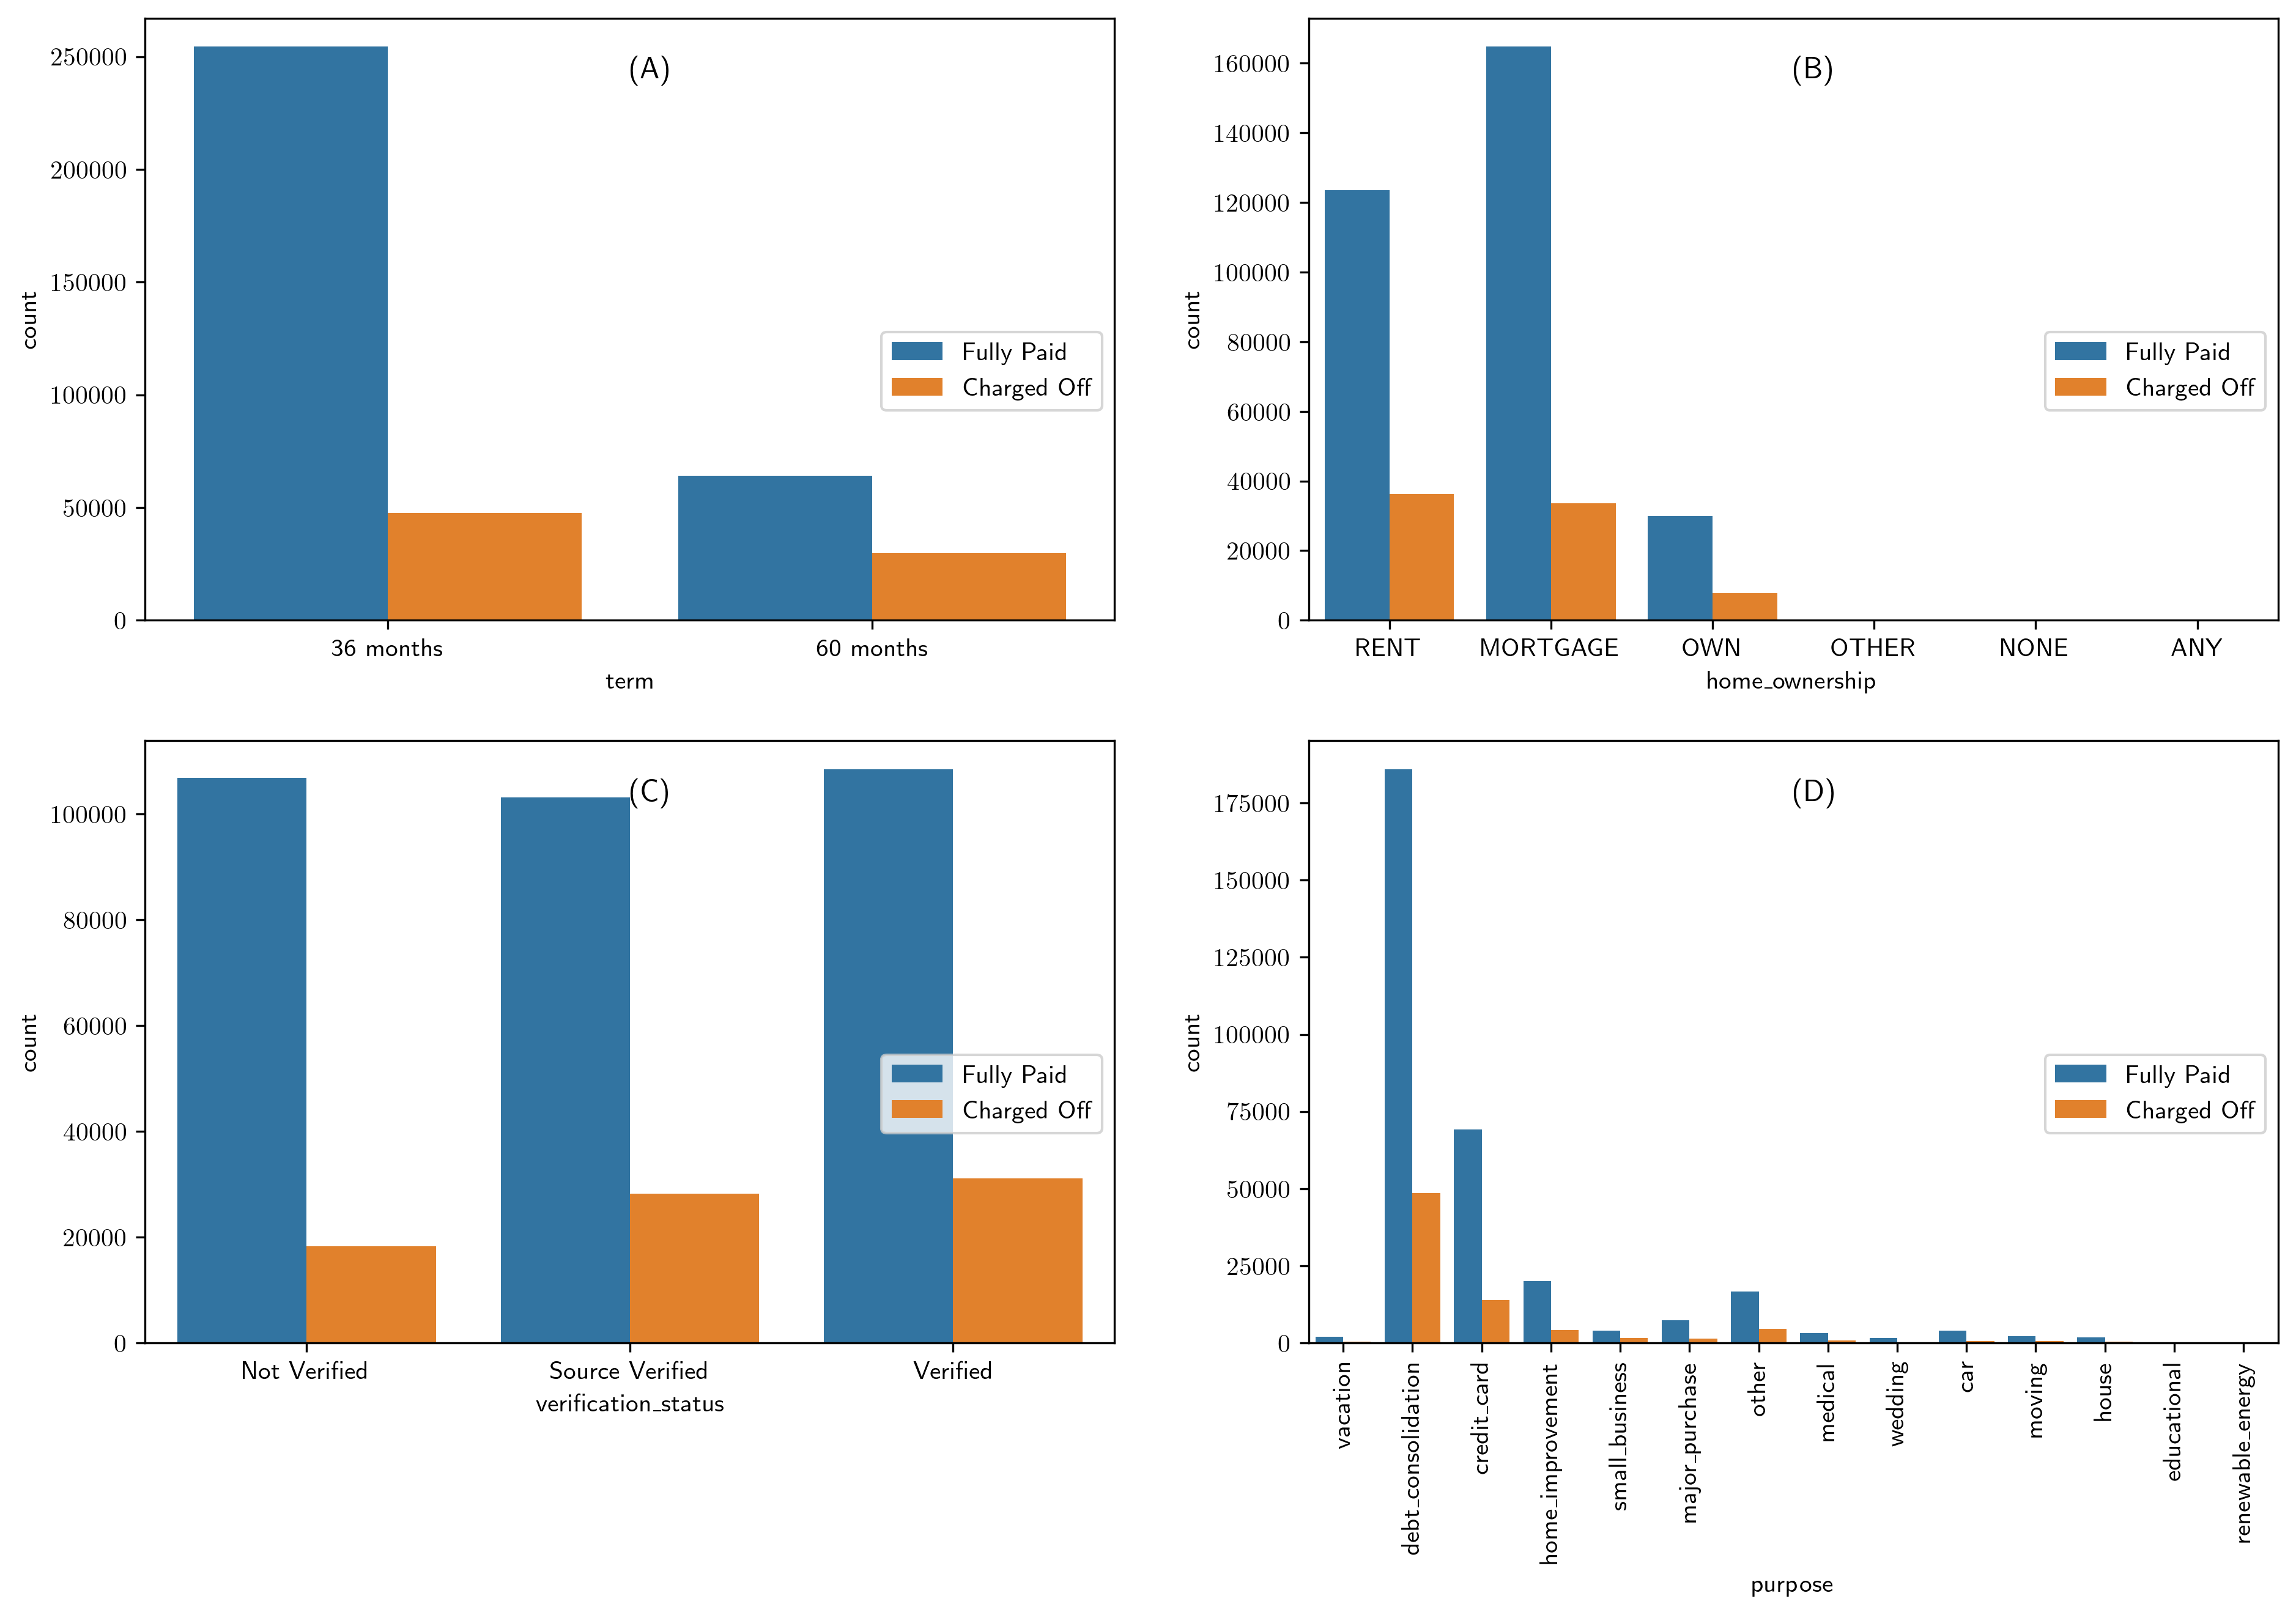

In [166]:
# Label subplots as A, B, C, D
subplot_labels = ['A', 'B', 'C', 'D']

plt.figure(figsize=(15, 20), dpi=300)

ax = plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')
ax.text(0.5, 0.9, f'({subplot_labels[0]})', transform=ax.transAxes, fontsize=12, weight='bold')
# Adjusting legend location
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))


ax=plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')
ax.text(0.5, 0.9, f'({subplot_labels[1]})', transform=ax.transAxes, fontsize=12, weight='bold')
# Adjusting legend location
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))


ax=plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')
ax.text(0.5, 0.9, f'({subplot_labels[2]})', transform=ax.transAxes, fontsize=12, weight='bold')
# Adjusting legend location
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))


ax=plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);
ax.text(0.5, 0.9, f'({subplot_labels[-1]})', transform=ax.transAxes, fontsize=12, weight='bold')
# Adjusting legend location
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))


# Save the heatmap as a figure
plt.savefig(os.path.join(output_folder,'compare_ls.pdf'), dpi=300, bbox_inches='tight')


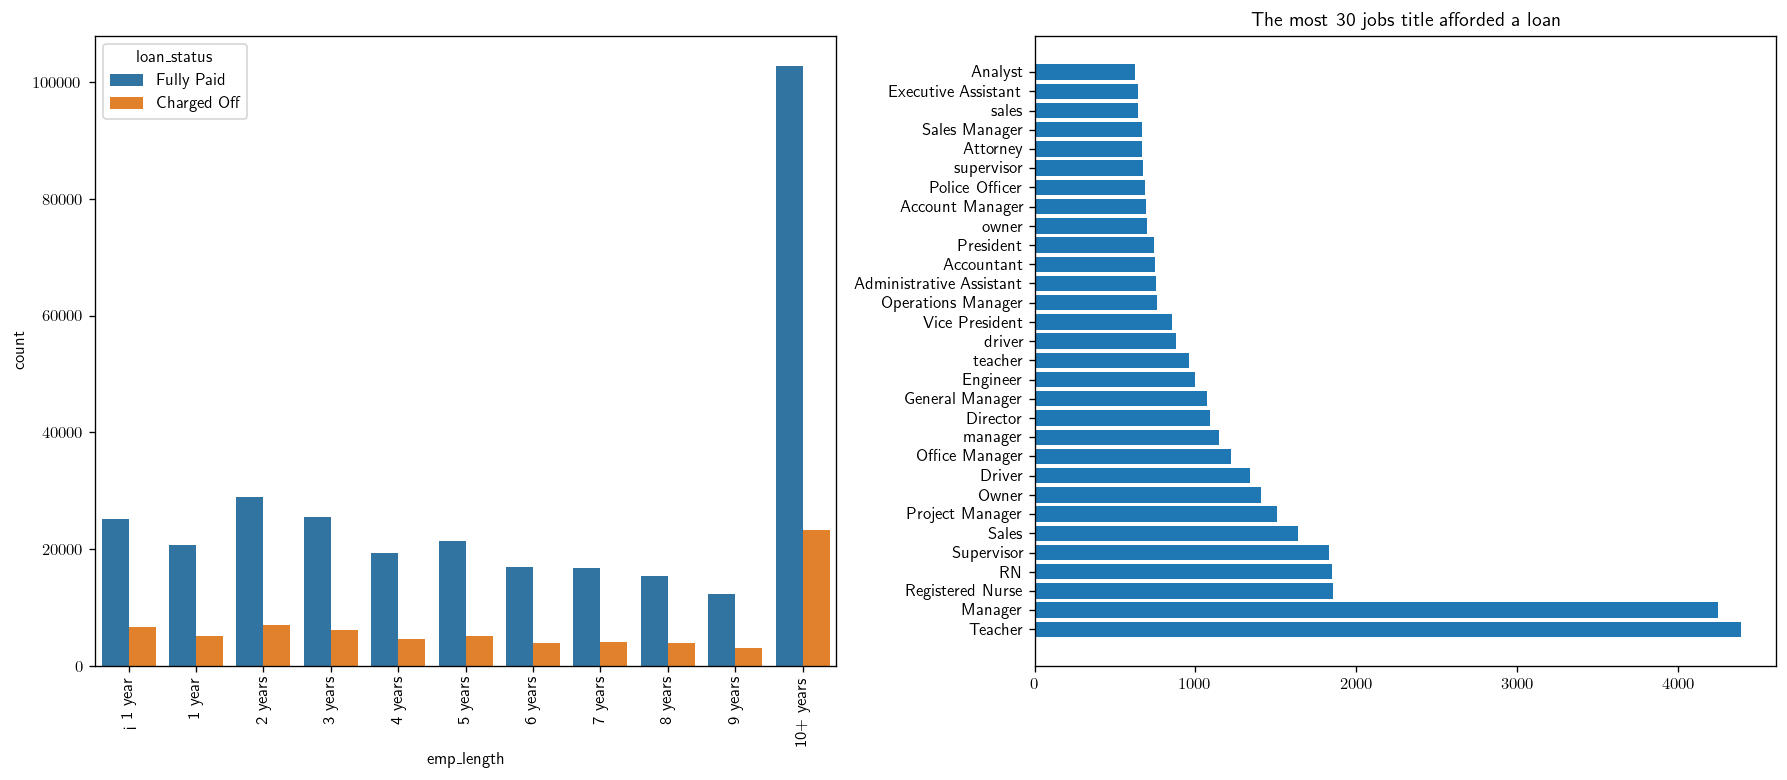

In [167]:
plt.figure(figsize=(15, 12), dpi=120)

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

 * Individuals with extended employment tenures often exhibit stable employment, indicating consistent income streams. This stability can correlate with a higher ability to meet loan obligations, thereby increasing the likelihood of full loan repayment.
 
 * While a lengthy employment history is generally positive, individuals with more than 10 years in a single job might face career stagnation. This stagnation could lead to reduced motivation or complacency, potentially impacting their financial decisions, including loan repayment.
 
* Occupations in education, healthcare, and management tend to offer a degree of job security. Teachers, nurses, and managers are in demand in almost every economy, reducing the risk of sudden job loss.

* Correlation matrix

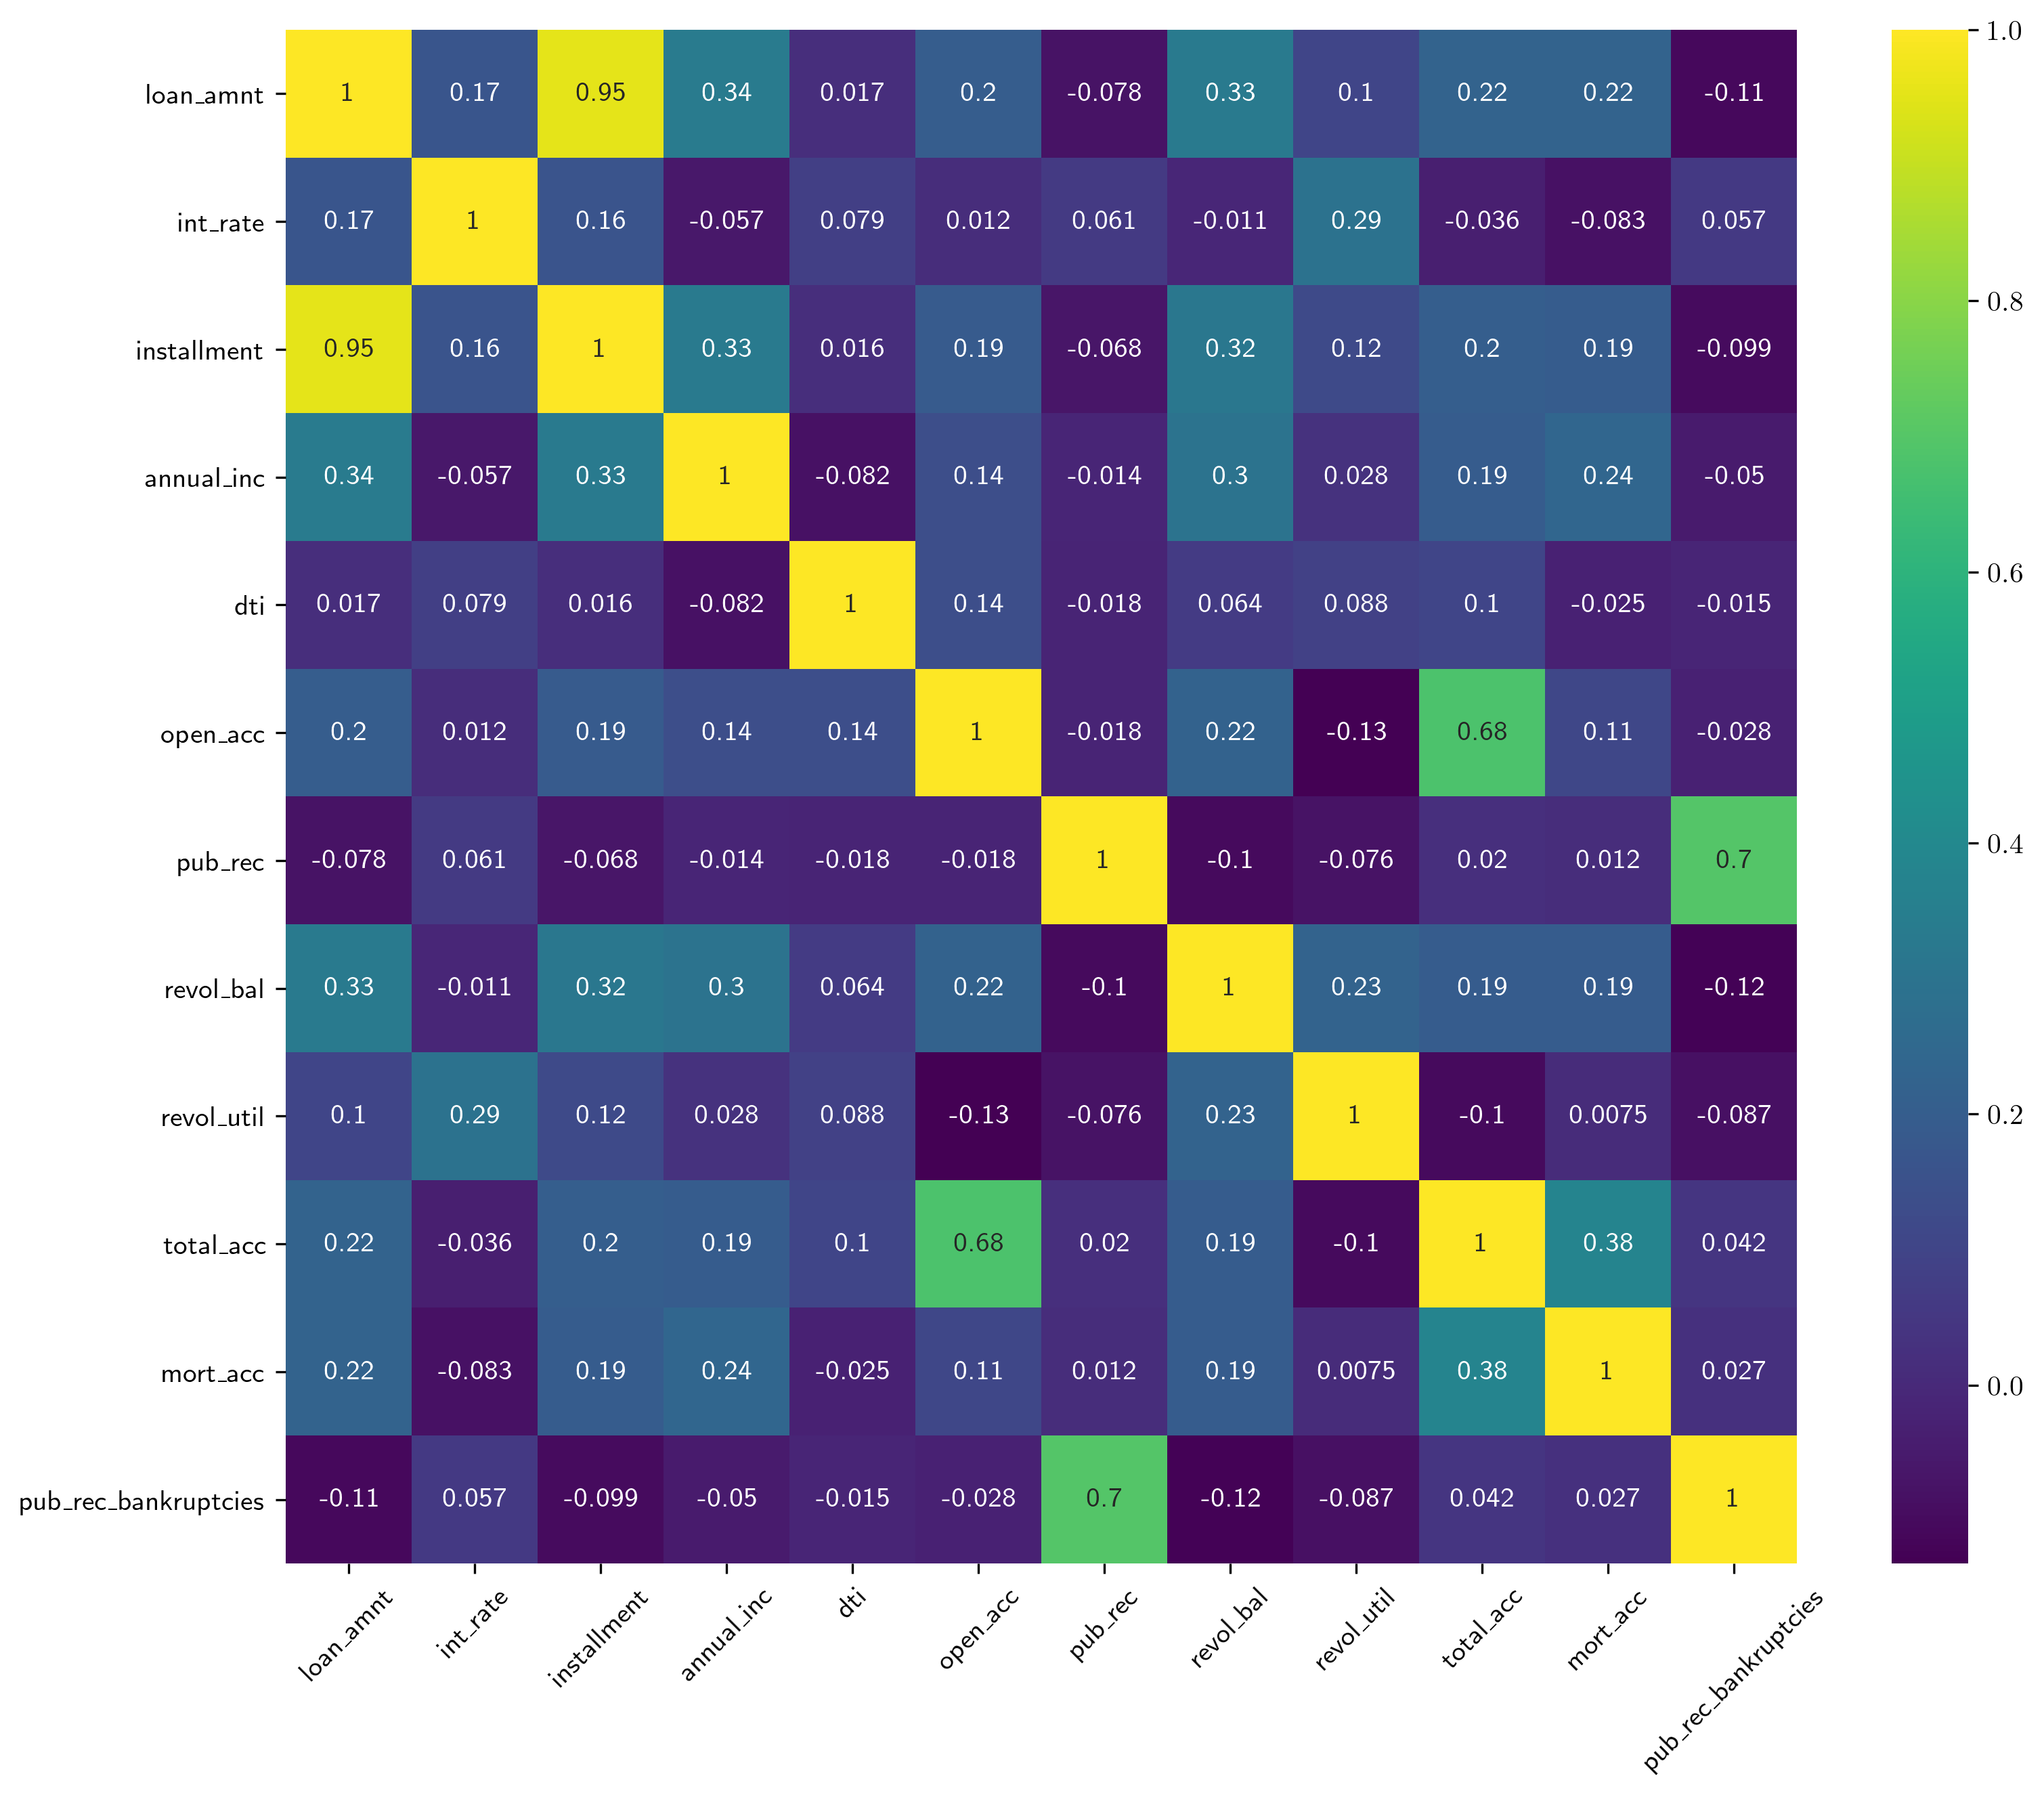

In [168]:
plt.figure(figsize=(12, 10), dpi=300)
sns.heatmap(data.corr(), annot=True, cmap='viridis')
# Rotate x-axis ticks
plt.xticks(rotation=45) 

# Save the heatmap as a figure
plt.savefig(os.path.join(output_folder,'heatmap.pdf'), dpi=300, bbox_inches='tight')
plt.show()

In [169]:
loan_amnt_box = data.hvplot.box(
    y='loan_amnt', subplots=True, by='loan_status', width=300, height=350, 
    title="Loan Status by Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = data.hvplot.box(
    y='installment', subplots=True, by='loan_status', width=300, height=350, 
    title="Loan Status by Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box

# plt.show()

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

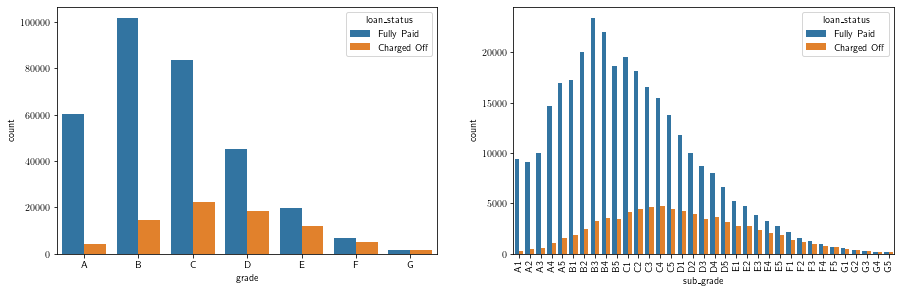

In [170]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

* Visualise and drop missing data

<Figure size 3000x1800 with 0 Axes>

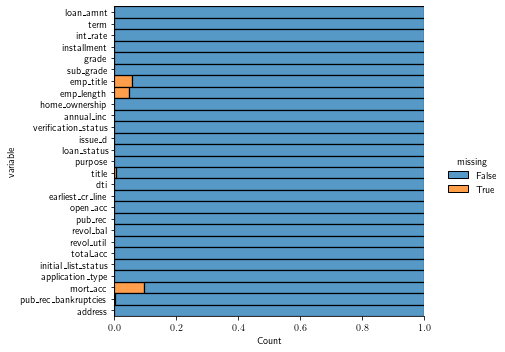

In [171]:
visMissData(df_ = data)

<Figure size 3000x1800 with 0 Axes>

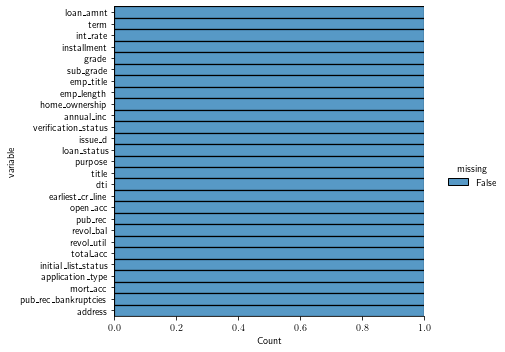

In [172]:
data.dropna( inplace=True)
visMissData(df_ = data)

* Drop certain comns in the data

In [173]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [174]:
data.drop(['emp_length',
           'address',
           'earliest_cr_line',
          'emp_title',
          'mort_acc',
          'sub_grade',
          'issue_d',
           'title',
          'initial_list_status',
          'purpose',
          'application_type',
          'verification_status'], axis=1, inplace=True)

* Separate categorical data from numerical data

In [175]:
cat_features = data.select_dtypes(exclude=[np.number])
cat_features.head()

term grade home_ownership  loan_status
0   36 months     B           RENT   Fully Paid
1   36 months     B       MORTGAGE   Fully Paid
2   36 months     B           RENT   Fully Paid
3   36 months     A           RENT   Fully Paid
4   60 months     C       MORTGAGE  Charged Off

In [106]:
num_features = data.select_dtypes(include=[np.number])
num_features.head()

loan_amnt  int_rate  installment  annual_inc   dti  open_acc  pub_rec  \
0   10000.00     11.44       329.48   117000.00 26.24     16.00     0.00   
1    8000.00     11.99       265.68    65000.00 22.05     17.00     0.00   
2   15600.00     10.49       506.97    43057.00 12.79     13.00     0.00   
3    7200.00      6.49       220.65    54000.00  2.60      6.00     0.00   
4   24375.00     17.27       609.33    55000.00 33.95     13.00     0.00   

   revol_bal  revol_util  total_acc  pub_rec_bankruptcies  
0   36369.00       41.80      25.00                  0.00  
1   20131.00       53.30      27.00                  0.00  
2   11987.00       92.20      26.00                  0.00  
3    5472.00       21.50      13.00                  0.00  
4   24584.00       69.80      43.00                  0.00

* encode loan_status into 0's \& 1's

In [107]:
dfL = num_features.copy()
cat_maps = {'loanStatus': {'Fully Paid': 0, 'Charged Off': 1} }
dfL['loanStatus'] = data['loan_status']

dfL['loanStatus'] = dfL['loanStatus'].map(cat_maps['loanStatus'])
dfL.dropna( inplace=True)
dfL.head()

loan_amnt  int_rate  installment  annual_inc   dti  open_acc  pub_rec  \
0   10000.00     11.44       329.48   117000.00 26.24     16.00     0.00   
1    8000.00     11.99       265.68    65000.00 22.05     17.00     0.00   
2   15600.00     10.49       506.97    43057.00 12.79     13.00     0.00   
3    7200.00      6.49       220.65    54000.00  2.60      6.00     0.00   
4   24375.00     17.27       609.33    55000.00 33.95     13.00     0.00   

   revol_bal  revol_util  total_acc  pub_rec_bankruptcies  loanStatus  
0   36369.00       41.80      25.00                  0.00           0  
1   20131.00       53.30      27.00                  0.00           0  
2   11987.00       92.20      26.00                  0.00           0  
3    5472.00       21.50      13.00                  0.00           0  
4   24584.00       69.80      43.00                  0.00           1

#### Handle heavy skewness in the data using Quantile transformation

* B4 scaling

Time taken to create LClub pairplot: 785.9777171611786 seconds


<Figure size 7500x7500 with 0 Axes>

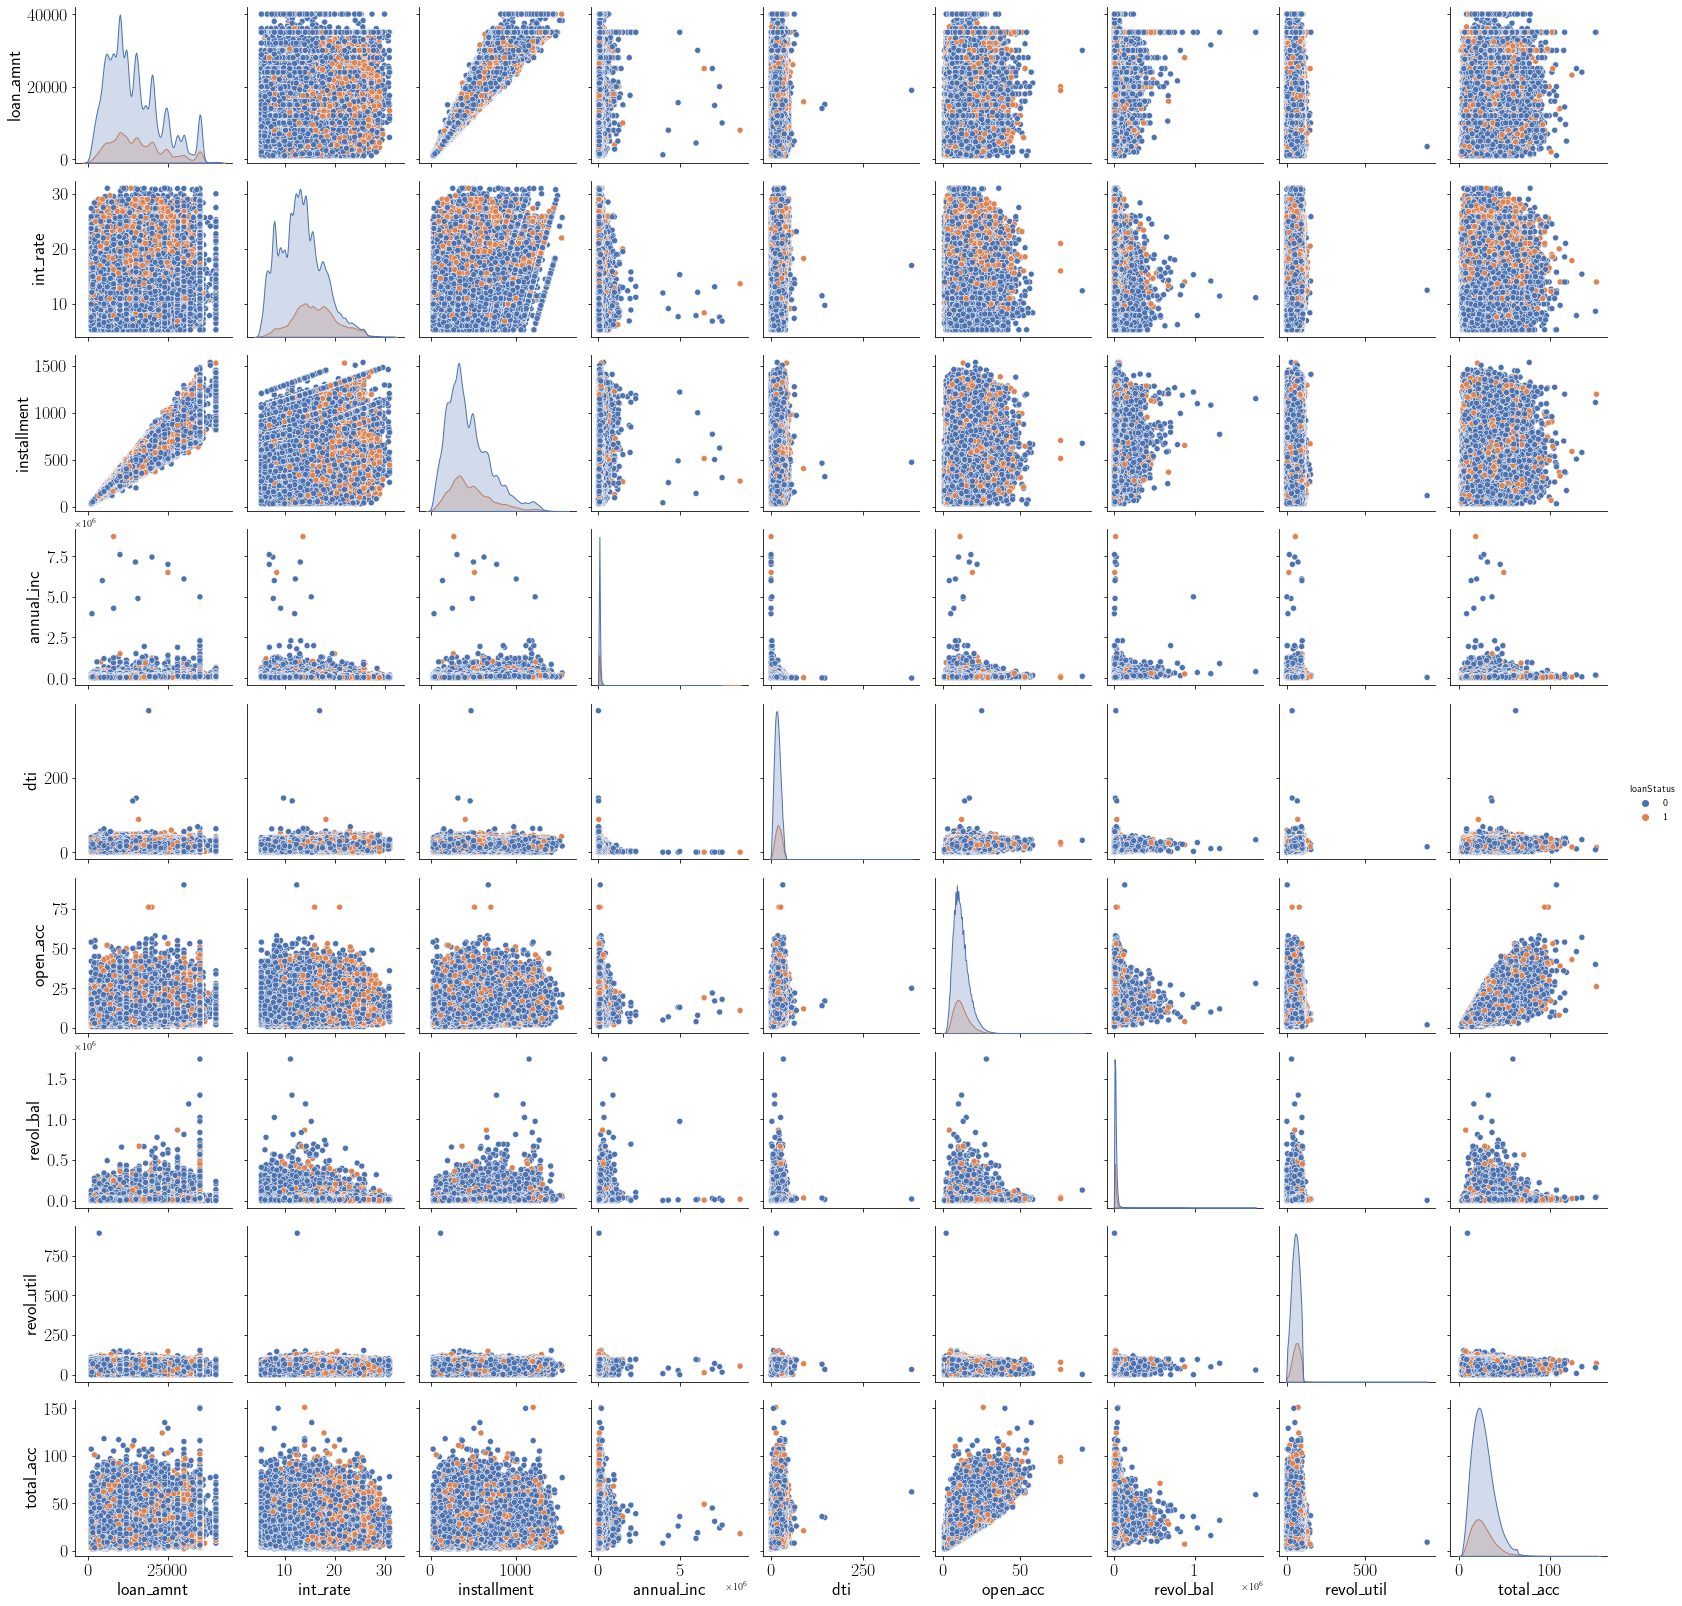

In [110]:
# data_transd['loanStatus'] = dfL['loanStatus']

import time

plt.figure(figsize=(25,25), dpi=300)

# Measure the time to create each pairplot
start_time = time.time()

# drop some 
# dfL.drop(['pub_rec_bankruptcies', 'pub_rec' ], axis=1, inplace=True)

pairplot = sns.pairplot(data=dfL.drop(['pub_rec_bankruptcies', 'pub_rec' ], axis=1, inplace=False),
             hue='loanStatus',
             diag_kind='kde',
             palette='deep')

# Set x and y label font sizes individually
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)
    
# Adjust x and y tick label sizes for all subplots
for ax in pairplot.axes.flat:
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
elapsed_time = time.time() - start_time
print(f"Time taken to create LClub pairplot: {elapsed_time} seconds")

# Increase DPI for higher resolution (adjust the DPI value as needed)
# plt.savefig('skew_distribution.png', dpi=300)
plt.savefig(os.path.join(output_folder,'skew_distribution.pdf'), dpi=300)

* After scaling

In [108]:
from sklearn.preprocessing import QuantileTransformer as qt

In [109]:
# quantile transform the raw data
quantile = qt(output_distribution='normal')
dataQt = quantile.fit_transform(dfL.iloc[:, dfL.columns != 'loanStatus'])
data_transd = pd.DataFrame(dataQt, columns=list(dfL.columns[dfL.columns != 'loanStatus']))
data_transd.head()

loan_amnt  int_rate  installment  annual_inc   dti  open_acc  pub_rec  \
0      -0.36     -0.51        -0.30        1.16  0.98      0.95    -5.20   
1      -0.69     -0.39        -0.66        0.00  0.53      1.10    -5.20   
2       0.31     -0.69         0.44       -0.83 -0.52      0.46    -5.20   
3      -0.81     -1.84        -0.91       -0.38 -2.16     -1.24    -5.20   
4       1.08      0.77         0.75       -0.33  1.94      0.46    -5.20   

   revol_bal  revol_util  total_acc  pub_rec_bankruptcies  
0       1.47       -0.49       0.06                 -5.20  
1       0.68       -0.07       0.23                 -5.20  
2       0.05        1.68       0.15                 -5.20  
3      -0.82       -1.27      -1.15                 -5.20  
4       0.93        0.56       1.36                 -5.20

Time taken to create LClub pairplot: 675.0767261981964 seconds


<Figure size 7500x7500 with 0 Axes>

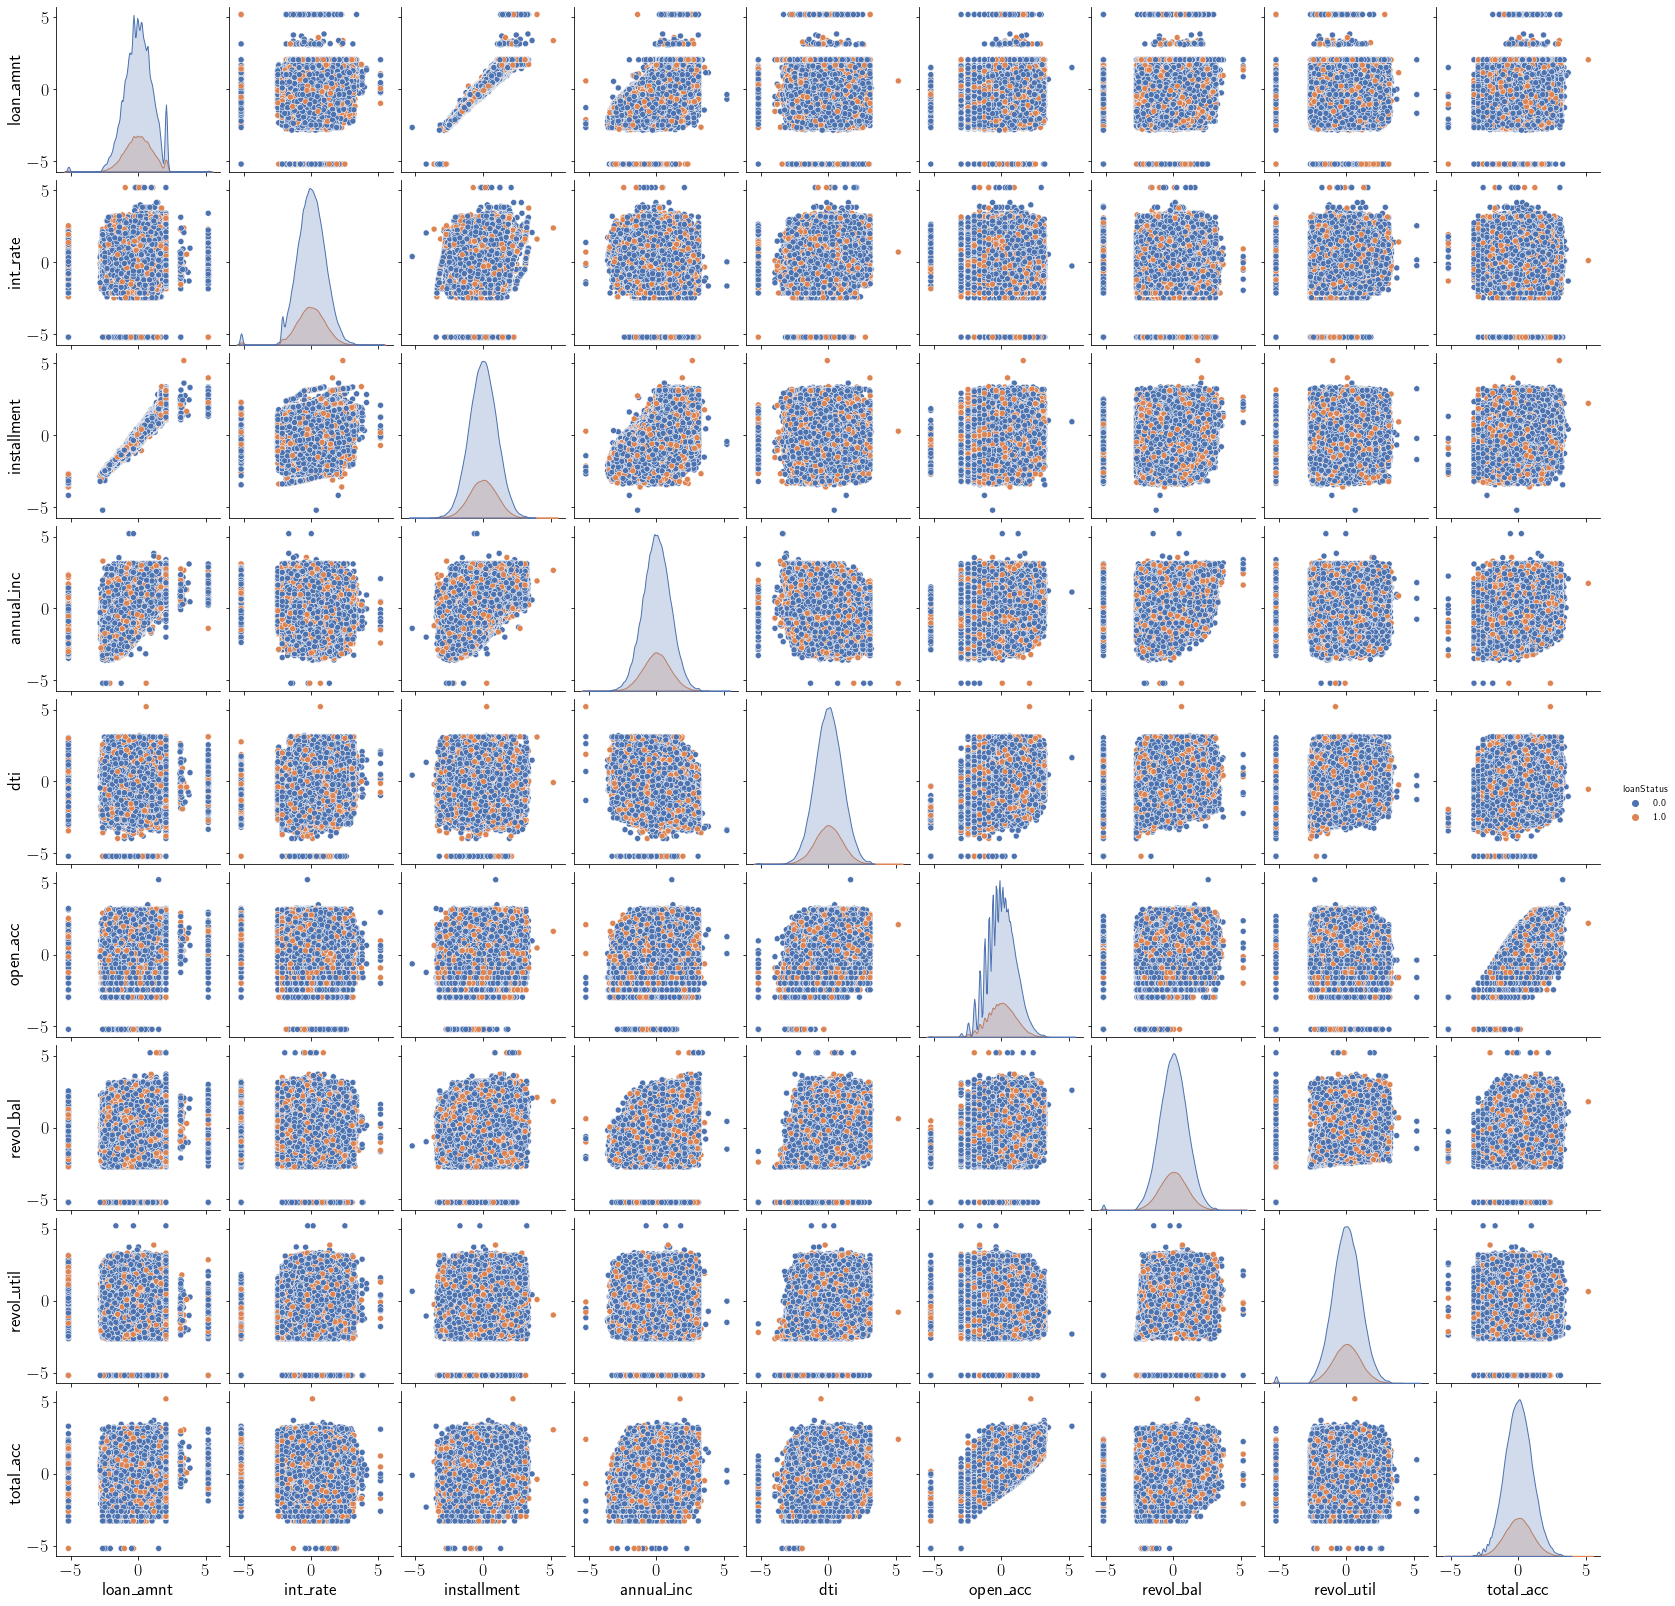

In [111]:
data_transd['loanStatus'] = dfL['loanStatus']

import time

plt.figure(figsize=(25,25), dpi=300)

# Measure the time to create each pairplot
start_time = time.time()

# drop some 
data_transd.drop(['pub_rec_bankruptcies', 'pub_rec' ], axis=1, inplace=True)

pairplot = sns.pairplot(data=data_transd,
             hue='loanStatus',
             diag_kind='kde',
             palette='deep')

# Set x and y label font sizes individually
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)
    
# Adjust x and y tick label sizes for all subplots
for ax in pairplot.axes.flat:
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
elapsed_time = time.time() - start_time
print(f"Time taken to create LClub pairplot: {elapsed_time} seconds")

# Increase DPI for higher resolution (adjust the DPI value as needed)
# plt.savefig('pairplot_high_res_quantile.png', dpi=300)
plt.savefig(os.path.join(output_folder,'pairplot_high_res_quantile.pdf'), dpi=300)

* Flag extreme outliers

In [112]:
from sklearn.ensemble import IsolationForest

In [113]:
yt = data_transd[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc' ]]

In [118]:
# Instantiate and fit the Isolation Forest model with improved hyperparameters
clf = IsolationForest(contamination=0.35, random_state=42)  # Adjust contamination based on your dataset
outliers_mask = clf.fit_predict(yt.values) == -1

pd.DataFrame(yt.values[~outliers_mask], columns=list(yt.columns))

loan_amnt  int_rate  installment  annual_inc   dti  open_acc  \
0           -0.36     -0.51        -0.30        1.16  0.98      0.95   
1           -0.69     -0.39        -0.66        0.00  0.53      1.10   
2            0.31     -0.69         0.44       -0.83 -0.52      0.46   
3            1.08      0.77         0.75       -0.33  1.94      0.46   
4            0.04     -0.54         0.15       -0.69  1.05      0.07   
...           ...       ...          ...         ...   ...       ...   
218309      -0.08     -0.29         0.05       -0.42  0.01     -1.24   
218310       0.90      1.12         1.31        1.47  0.79      1.24   
218311      -0.36     -0.60        -0.93       -1.01 -0.18     -1.24   
218312      -1.28     -0.78        -1.36       -0.27  0.04      0.80   
218313       0.84      0.40         0.42       -0.04 -0.15     -0.39   

        revol_bal  revol_util  total_acc  
0            1.47       -0.49       0.06  
1            0.68       -0.07       0.23  
2            0.05        1.68       0.15  
3            0.93        0.56       1.36  
4            0.18        0.35      -0.91  
...           ...         ...        ...  
218309      -0.21        0.41      -0.59  
218310       0.81       -0.18       1.10  
218311      -1.64       -0.77      -0.11  
218312       1.32        0.44      -0.11  
218313       0.37       -0.05      -0.39  

[218314 rows x 9 columns]

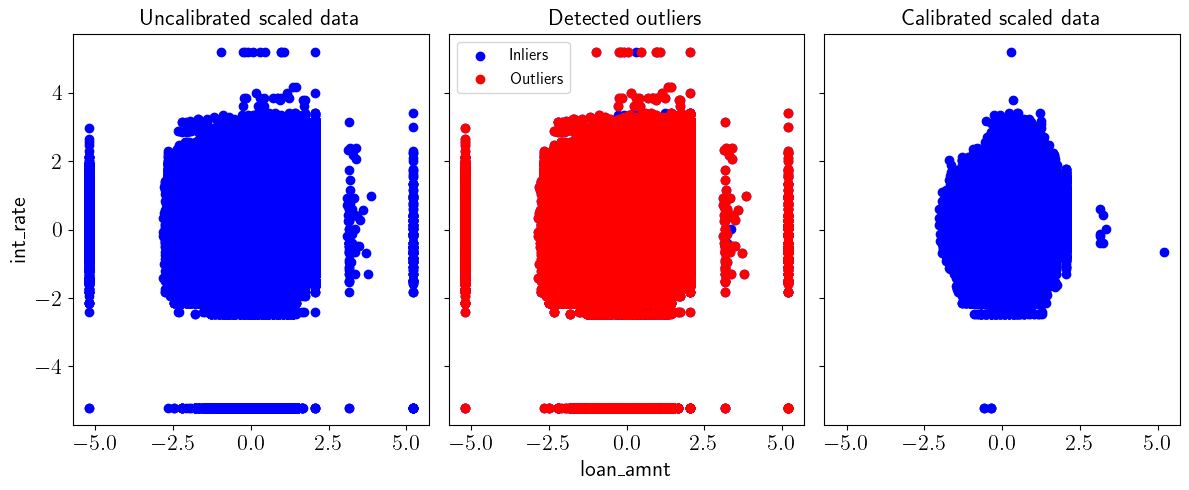

In [123]:

# Create a 1 by 3 subplot with shared y-axis
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 5), dpi=100)

# Plot on each subplot
axes[0].scatter(yt['loan_amnt'], yt['int_rate'], c='blue') #, label='Inliers'
axes[0].set_title(f'Uncalibrated scaled data')
axes[0].set_ylabel('int_rate')
axes[0].grid(False)

axes[1].scatter(yt['loan_amnt'], yt['int_rate'], c='blue', label='Inliers')
axes[1].scatter(yt['loan_amnt'][outliers_mask], 
                yt['int_rate'][outliers_mask], c='red', label='Outliers')

axes[1].set_title('Detected outliers')
axes[1].set_xlabel('loan_amnt')
# Add legend to the subplot
axes[1].legend(fontsize='large', framealpha=0.8, loc='best')
axes[1].grid(False)

axes[2].scatter(yt['loan_amnt'][~outliers_mask], 
                yt['int_rate'][~outliers_mask], c='blue') # , label='clean'
axes[2].set_title(f'Calibrated scaled data')
axes[2].grid(False)

# # Add common labels
# fig.text(0.5, 0.04, 'X-axis', ha='center', va='center')
# fig.text(0.06, 0.5, 'Y-axis', ha='center', va='center', rotation='vertical')

# Adjust layout to prevent clipping of labels

# Set x and y label font sizes individually
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_title(ax.get_title(), fontsize=16)
    
# Adjust x and y tick label sizes for all subplots
for ax in axes.flat:
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
# Adjust the layout to prevent clipping of the legend
fig.tight_layout()

# plt.tight_layout()

Time taken to create LClub pairplot: 289.94432735443115 seconds


<Figure size 7500x7500 with 0 Axes>

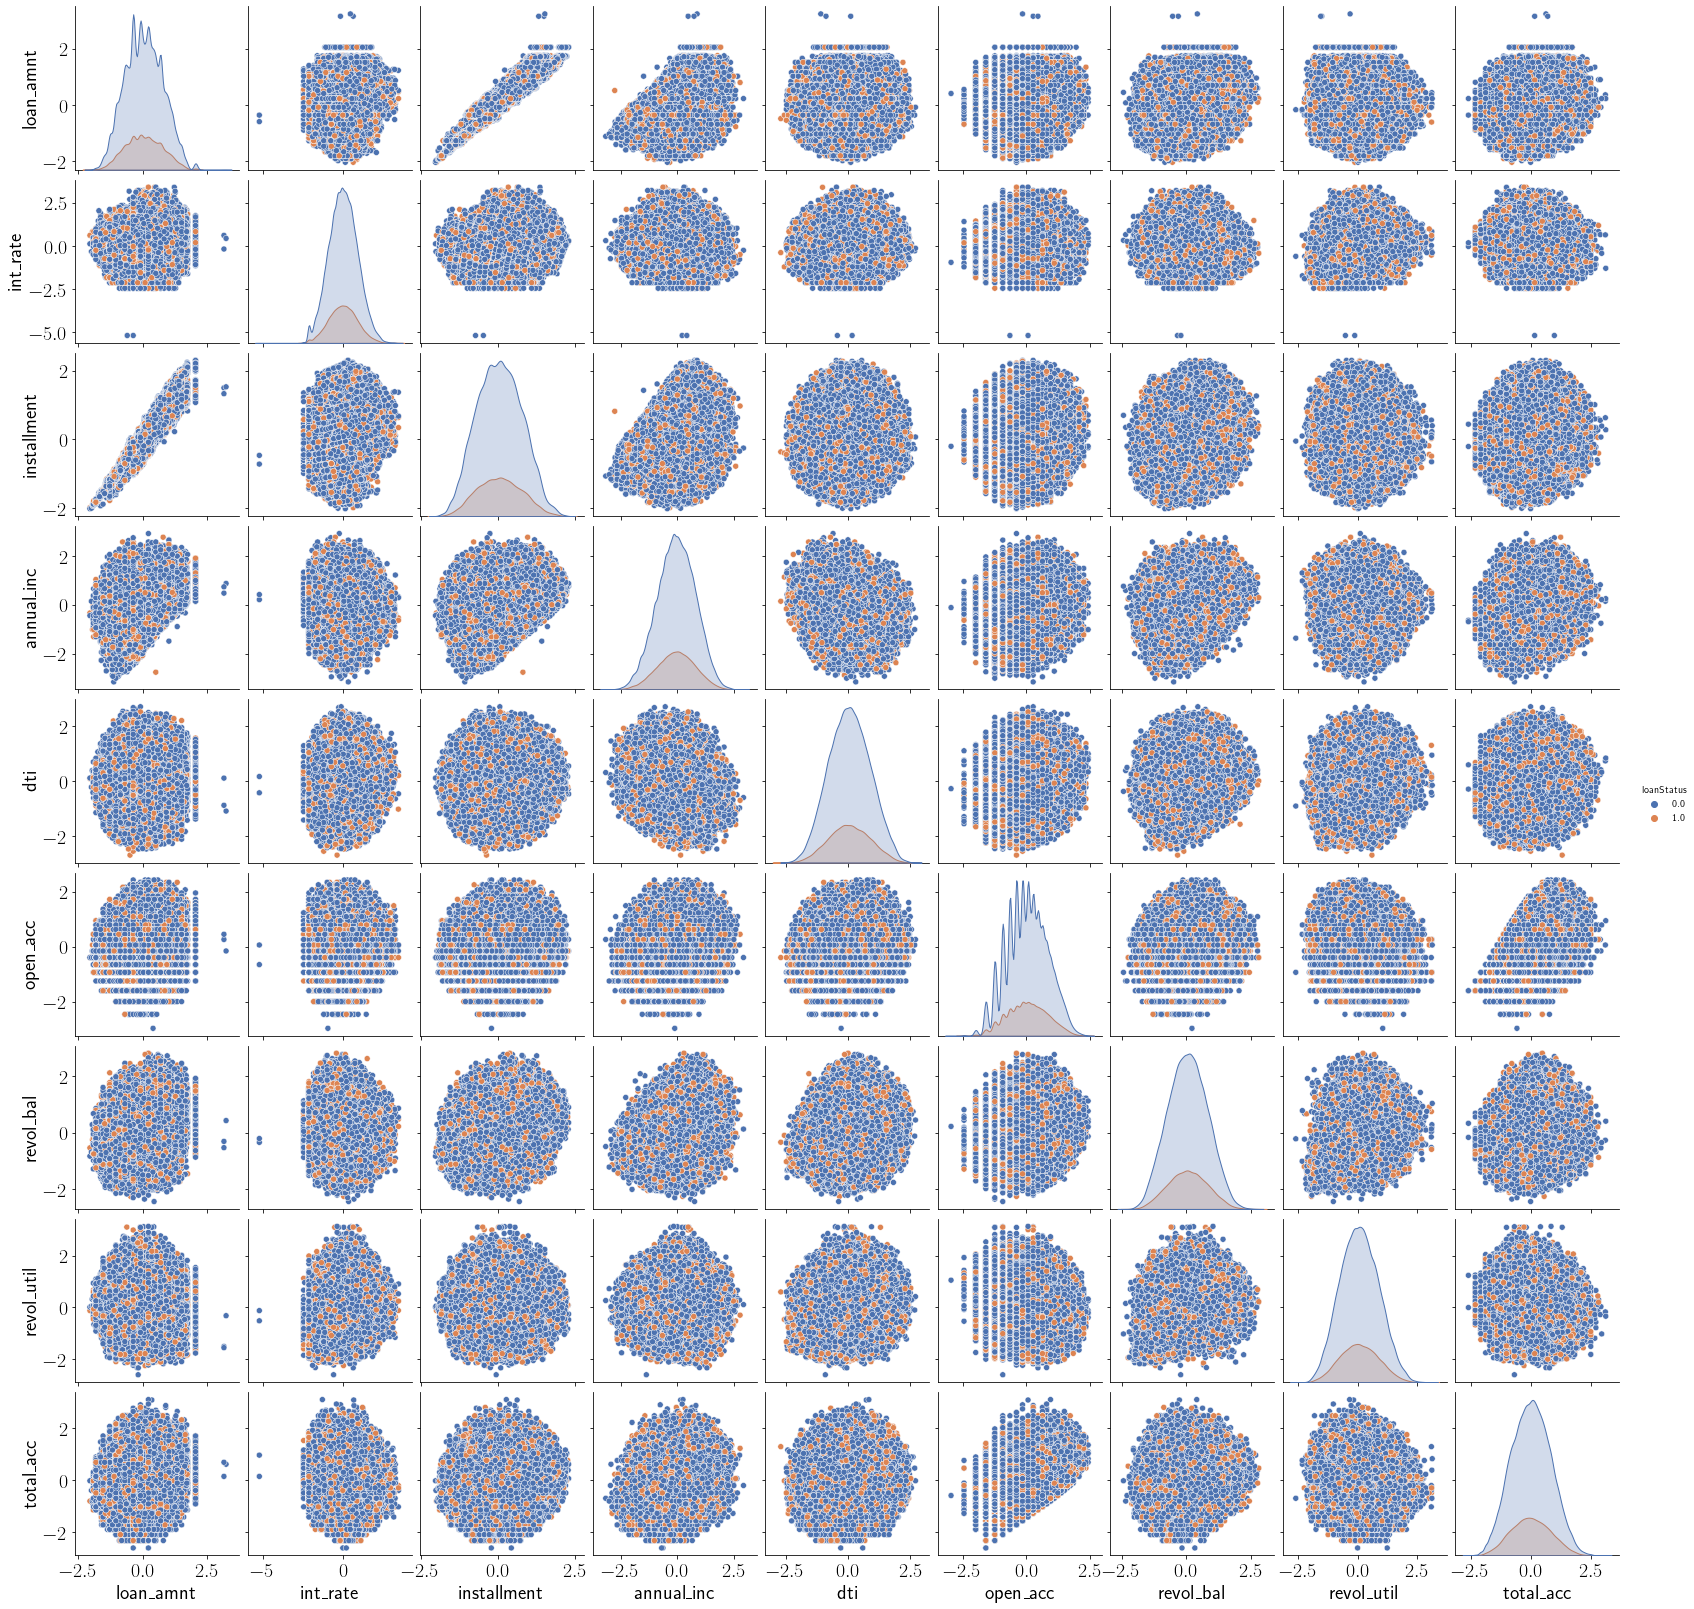

In [127]:
ytG = pd.DataFrame(yt.values[~outliers_mask], columns=list(yt.columns))
ytG['loanStatus'] = data_transd['loanStatus'][~outliers_mask]


import time

plt.figure(figsize=(25,25), dpi=300)

# Measure the time to create each pairplot
start_time = time.time()

# drop some 
# data_transd.drop(['pub_rec_bankruptcies', 'pub_rec' ], axis=1, inplace=True)

pairplot = sns.pairplot(data=ytG,
             hue='loanStatus',
             diag_kind='kde',
             palette='deep')

# Set x and y label font sizes individually
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    
# Adjust x and y tick label sizes for all subplots
for ax in pairplot.axes.flat:
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    
elapsed_time = time.time() - start_time
print(f"Time taken to create LClub pairplot: {elapsed_time} seconds")

# # Increase DPI for higher resolution (adjust the DPI value as needed)
# plt.savefig('pairplot_high_res_quantile.png', dpi=300)
plt.savefig(os.path.join(output_folder,'unbalanced_scaledplot.pdf'), dpi=300)

* check imbalanced

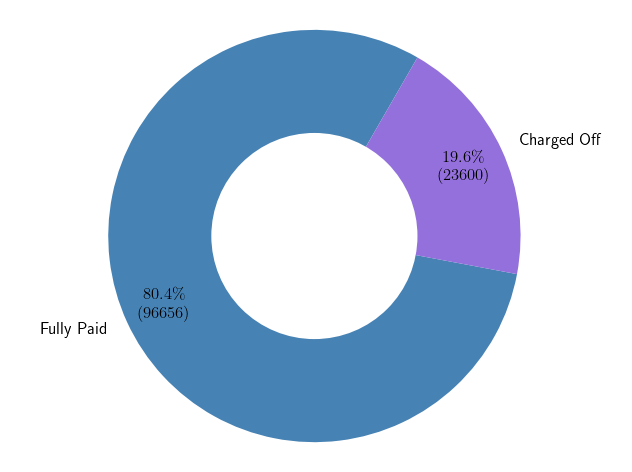

In [128]:
labels = ['Fully Paid', 'Charged Off'] 
sizes = [ytG['loanStatus'].value_counts()[0], ytG['loanStatus'].value_counts()[1]] 


topN = len(labels)
colors = ['steelblue', 'mediumpurple']
# colors = random.sample(population=list(mcd.CSS4_COLORS.keys()), k=topN)
fig1, ax1 = plt.subplots(figsize=(8,6), dpi=80)


patches, texts, autotexts = ax1.pie(sizes,
                                    labels=labels,
                                    autopct=make_autopct(values=sizes),
                                    startangle=60, 
                                    pctdistance=0.80, 
                                    colors = colors,
                                    textprops={'fontsize': 15}) 
# shadow=True,
for k in range(len(labels)):
        texts[k].set_fontsize(15)
        
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig(os.path.join(output_folder,'baisede.pdf'), dpi = 200)
# plt.savefig('unbaised.png', dpi = 200)
# print(colors)

### Cluster Centroids

In [176]:
cat_features.columns

Index(['term', 'grade', 'home_ownership', 'loan_status'], dtype='object')

In [177]:
cat_features.head()

term grade home_ownership  loan_status
0   36 months     B           RENT   Fully Paid
1   36 months     B       MORTGAGE   Fully Paid
2   36 months     B           RENT   Fully Paid
3   36 months     A           RENT   Fully Paid
4   60 months     C       MORTGAGE  Charged Off

In [189]:
cat_features.isnull().sum()

term              0
grade             0
home_ownership    0
loan_status       0
dtype: int64

In [191]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
Encoded_Category = cat_features.copy()
for col in list(cat_features.columns):
    Encoded_Category[col] = label_encoder.fit_transform(cat_features[col])
Encoded_Category.head()

term  grade  home_ownership  loan_status
0     0      1               5            1
1     0      1               1            1
2     0      1               5            1
3     0      0               5            1
4     1      2               1            0

In [225]:
Encoded_Category['loan_status'].value_counts()[1] 

269556

In [229]:
Encoded_Category['loan_status'][~outliers_mask].value_counts()[:].sum()

218314

In [192]:
# list(cat_features['term'])

In [139]:
# cat_features.dropna(axis=0, inplace=True)

In [193]:
# len(~outliers_mask), len

In [150]:
# # cat_features.drop(['title', 'loan_status' ], axis=1, inplace=True)
# # Assigning categorical variables to a numerical value
# # data_transd['loanStatus'] = dfL['loanStatus']
# cat_maps = {'term': {' 36 months': 0,
#                      ' 60 months': 1},
#            'grade': {'A': 0, 
#                      'B': 1,
#                      'C': 2,
#                      'D': 3, 
#                      'E': 4, 
#                      'F': 5,
#                      'G': 6},
# #            'emp_length': {'< 1 year': 0,
# #                           '1 year': 1, 
# #                           '2 years': 2, 
# #                           '3 years': 3,
# #                           '4 years': 4, 
# #                           '5 years': 5, 
# #                           '6 years': 6, 
# #                           '7 years': 7,
# #                           '8 years': 8, 
# #                           '9 years': 9, 
# #                           '10+ years': 10},
#             'home_ownership': {'RENT': 0, 
#                                'MORTGAGE': 1,
#                                'OWN': 2,
#                                'OTHER': 3,
#                               'NONE': 4,
#                                'ANY': 5},
# #             'loan_status': {'Fully Paid': 0,
# #                             ' Charged Off': 1}
            
#            }
# # dfm = data_transd.copy()
# # dfm['term'] = cat_features['term'].map(cat_maps['term'])
# # dfm['grade'] = cat_features['grade'].map(cat_maps['grade'])
# # dfm['home_ownership'] = cat_features['home_ownership'].map(cat_maps['home_ownership'])
# # # data['loan_status'] = data['loan_status'].map(cat_maps['loan_status'])
# # # data['emp_length'] = data['emp_length'].map(cat_maps['emp_length'])
# # dfm.head()

# dfm = ytG.copy()
# dfm['term'] = cat_features['term'][~outliers_mask].map(cat_maps['term'])
# dfm['grade'] = cat_features['grade'][~outliers_mask].map(cat_maps['grade'])
# dfm['home_ownership'] = cat_features['home_ownership'][~outliers_mask].map(cat_maps['home_ownership'])
# # dfm['loan_status'] = cat_features['loan_status'][~outliers_mask].map(cat_maps['loan_status'])
# # data['emp_length'] = data['emp_length'].map(cat_maps['emp_length'])
# dfm.dropna(axis=0, inplace=True)
# dfm.head()

loan_amnt  int_rate  installment  annual_inc   dti  open_acc  revol_bal  \
0      -0.36     -0.51        -0.30        1.16  0.98      0.95       1.47   
1      -0.69     -0.39        -0.66        0.00  0.53      1.10       0.68   
2       0.31     -0.69         0.44       -0.83 -0.52      0.46       0.05   
4       0.04     -0.54         0.15       -0.69  1.05      0.07       0.18   
7      -0.36     -0.08        -0.24        0.76 -0.62     -1.60      -0.98   

   revol_util  total_acc  loanStatus  term  grade  home_ownership  
0       -0.49       0.06        0.00  0.00   1.00            0.00  
1       -0.07       0.23        0.00  0.00   1.00            1.00  
2        1.68       0.15        0.00  0.00   1.00            0.00  
4        0.35      -0.91        1.00  1.00   2.00            1.00  
7        0.34       0.15        0.00  0.00   1.00            0.00

In [208]:
ytG.isnull().sum()

loan_amnt          0
int_rate           0
installment        0
annual_inc         0
dti                0
open_acc           0
revol_bal          0
revol_util         0
total_acc          0
loanStatus     98058
dtype: int64

In [199]:
# len(Encoded_Category['term'][~outliers_mask])

218314

In [239]:
dfm = ytG.drop(['loanStatus'], axis=1, inplace=False).copy()
dfm['term'] = Encoded_Category['term'].values[~outliers_mask]
dfm['grade'] = Encoded_Category['grade'].values[~outliers_mask]
dfm['home_ownership'] = Encoded_Category['home_ownership'].values[~outliers_mask]
dfm['loan_status'] = Encoded_Category['loan_status'].values[~outliers_mask]
# # data['emp_length'] = data['emp_length'].map(cat_maps['emp_length'])
# # dfm.dropna(axis=0, inplace=True)
# dfm.head()

In [240]:
dfm.isnull().sum()

loan_amnt         0
int_rate          0
installment       0
annual_inc        0
dti               0
open_acc          0
revol_bal         0
revol_util        0
total_acc         0
term              0
grade             0
home_ownership    0
loan_status       0
dtype: int64

In [201]:
# Encoded_Category.shape

(335868, 4)

In [241]:
dfm.shape

(218314, 13)

In [242]:
# ytG.drop(['loanStatus'], axis=1, inplace=False).isnull().sum()

In [243]:
# dfm = ytG.drop(['loanStatus'], axis=1, inplace=False).copy()
# dfm.isnull().sum()

In [244]:
# Encoded_Category.shape, len(~outliers_mask)

In [245]:
# dfm['loan_status'] = Encoded_Category['loan_status'].values[~outliers_mask]
# dfm.isnull().sum()

In [246]:
# dfm.isnull().sum()

In [247]:
# plt.plot(Encoded_Category['loan_status'])

In [248]:
# plt.plot(Encoded_Category['loan_status'][~outliers_mask])

In [214]:
# # Check if any element is a boolean
# has_boolean = any(isinstance(element, bool) for element in list(~outliers_mask))

# # Print the result
# print("The list has a boolean value:", has_boolean)

The list has a boolean value: False


In [149]:
# dfm['loan_status'].value_counts()[1]

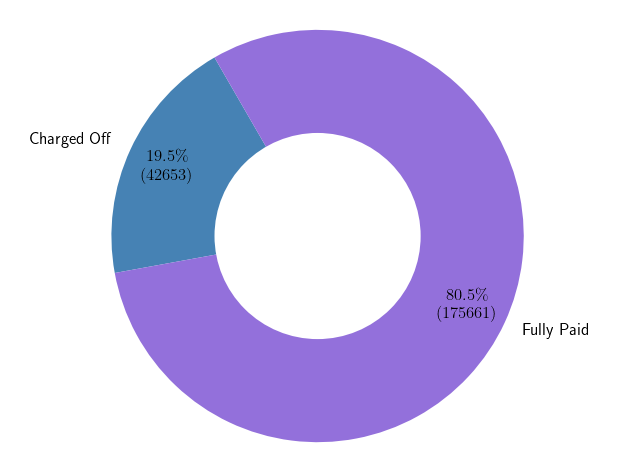

In [253]:
labels = [ 'Charged Off', 'Fully Paid'] 
# dfm['loan_status'] = dfm['loan_status'].astype(int)
sizes = [dfm['loan_status'].value_counts()[0], dfm['loan_status'].value_counts()[1]] 


topN = len(labels)
colors = ['steelblue', 'mediumpurple']
# colors = random.sample(population=list(mcd.CSS4_COLORS.keys()), k=topN)
fig1, ax1 = plt.subplots(figsize=(8,6), dpi=80)


patches, texts, autotexts = ax1.pie(sizes,
                                    labels=labels,
                                    autopct=make_autopct(values=sizes),
                                    startangle=120, 
                                    pctdistance=0.80, 
                                    colors = colors,
                                    textprops={'fontsize': 15}) 
# shadow=True,
for k in range(len(labels)):
        texts[k].set_fontsize(15)
        
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig(os.path.join(output_folder,'unbaisede.pdf'), dpi = 200)
# plt.savefig('unbaised.png', dpi = 200)
# print(colors)

In [254]:
dfm['loan_status'].value_counts()

1    175661
0     42653
Name: loan_status, dtype: int64

In [ ]:
Xe = dfm.iloc[:, dfm.columns != 'loan_status']
ye = dfm['loan_status']

"""
Balancing a dataset using the ClusterCentroids approach involves reducing the 
imbalance in the dataset by under-sampling the majority class. 
The ClusterCentroids algorithm identifies clusters of the majority class and 
generates centroids (representative points) for each cluster. 

These centroids are then used to create a balanced dataset.
"""
# try:
#     from imblearn.over_sampling import SMOTENC
# except:
#     from imblearn.over_sampling import SMOTENC

# smote = SMOTENC(random_state=SEED, categorical_features=[9, 10, 11], sampling_strategy='auto') # we pass the index of the input numerical features
# Xs , ys = smote.fit_resample(Xe, ye)

try:
    from imblearn.under_sampling import ClusterCentroids
except:
    from imblearn.under_sampling import ClusterCentroids
    
cc = ClusterCentroids(random_state=SEED)
X_resampled, y_resampled = cc.fit_resample(Xe, ye)

X_resampled.head()


In [ ]:
Qt = X_resampled.copy()
Qt['loan_status'] = y_resampled
# Save the DataFrame to a CSV file
Qt.to_csv('calibrated_loan_dataset.csv', index=False)